In [17]:
from scipy.optimize import minimize, curve_fit
from scipy.interpolate import interp1d, interp2d, CubicSpline
import matplotlib.pyplot as plt
import numpy as np

# Tema 4: Interpolacija, prileganje krivulje in optimizacija

V Pythonu imamo na voljo knjižnici zmogljivih matematičnih algoritmov, numeričnih metod in funkcij `numpy` (https://numpy.org/) in `scipy` (https://scipy.org/), ki na enostaven način omogočajo izvajanje številnih operacij nad podatki. V nadaljevanju se bomo na treh primerih seznanili s principi uporabe knjižnic in njenih funkcij. Te principe lahko kasneje apliciramo na uporabo ostalih funkcionalnosti `scipy`.

Kaj bomo naredili:
- na osnovi diskretnih meritev konstruiramo zvezno funkcijo (interpolacija)
- na osnovi diskretnih meritev konstruiramo prilegajočo funkcijo (regresija)
- na osnovi diskretnih meritev določimo parametre teoretičnega modela opazovanega pojava (prileganje krivulje)
- za opazovan pojav ob podanih pogojih izračunamo minimum kriterijske funkcije (optimizacija) 

Ob tem bomo spoznali:
- funkcijo `interp1d()` za določanje zvezne funkcije z linearno, kvadratično in kubično interpolacijo
- funkcijo `fit()` za generiranje prilegajoče funkcije
- funkcijo `curve_fit()` za računanje parametrov poljubnega teoretičnega modela
- funkcijo `minimize()` za optimizacijo funkcij z več spremenljivkami


## Uvodni primer
Zamislimo si opazovan pojav, ki ga lahko opišemo s funkcijo:

$$ f(x) = x^3 - 18x^2 + 7x + 25 $$

Zamislimo si še, da smo izvedli eksperiment in izvedli 25 meritev. 

In [57]:
x_meritve = [-5.000000,-4.191919,-3.383838,-2.575758,-1.767677,
             -0.959596,-0.151515,0.656566,1.464646,2.272727,
             3.080808,3.888889,4.696970,5.505051,6.313131,
             7.121212,7.929293,8.737374,9.545455,10.353535,
             11.161616,11.969697,12.777778,13.585859,14.393939]
y_meritve = [-547.148440,-353.038240,-242.999924,-86.603669,-14.756501,
             8.505361,69.994019,39.502621,42.075558,1.744931,
             -45.763899,-148.214227,-228.011926,-272.514651,-392.931986,
             -452.723155,-505.971239,-582.549094,-662.777496,-681.709586,
             -748.371566,-710.645987,-703.930784,-650.930046,-575.409236]

#### vizualizacija podatkov

Za lažje razumevanje najprej narišemo graf funkcije ter prikažemo podatke meritev grafu.

Pri tem si bomo pomagali s poljem 'numpy', ki omogoča vektorsko in matrično računanje. Za x vrednosti bomo ustvarili vektor 100 vrednosti s funkcijo `linspace()`, ki ustvari t.i. NumPy array. Spomnimo, da ta podatkovna struktura omogoča uporabo običajnih matematičnih operatorjev na način, da se le-ti izvedejo na vseh elementih polja in tako ne rabimo uporabiti zanke. Če na primer izračunamo y = 7 * x in je x polje, bodo vsi elementi polja pomnoženi s 7 in rezultat bo y, ki je prav tako polje z enakim številom elementov, kot jih ima polje x. Vse navedeno velja tudi za vhodne in iizhodne parametre funkcij.

Najprej ustvarimo funkcijo, ki vrača vrednosti skladno s funkcijskim predpisom, ki smo ga definirali zgoraj.

In [464]:
def f(x):
    return x**3 - 18*x**2 + 7*x + 25


Nato pripravimo graf ter tabeliramo vrednosti funkcije. Ustvarimo 100 števil enakomerno razporejenih na razponu med -6 in 18 in za vsa števila izračunamo vrednost funkcije `f`. Tako izračunane x in y prikažemo v črtnem grafu, torej za prikaz uporabimo funkcijo `plot()`.

V grafu prav tako prikažemo podatke meritev, le-te prikažimo kot razpršene točke, torej uporabimo funkcijo `scatter()`.

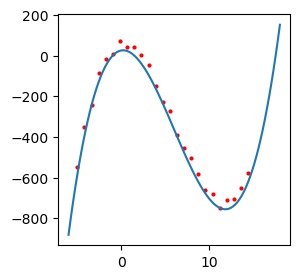

In [271]:
fig, ax = plt.subplots(figsize=(3,3))
x = np.linspace(-6, 18, 100)
y = f(x)
ax.plot(x,y)
ax.scatter(x_meritve, y_meritve, c='red', s=4);

## Interpolacija

Predpostavimo, da funkcijskega predpisa ne poznamo in imamo na voljo le rezultate meritev:

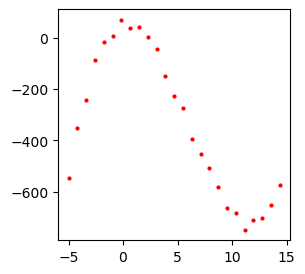

In [59]:
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(x_meritve, y_meritve, c='red', s=4);

Iz podatkov lahko ustvarimo funkcijo, ki bo izračunala funkcijske vrednosti tudi za vrednosti neodvisne spremenljivke za katere nimamo meritev.

V ta namen lahko izvedemo interpolacijo. Za to lahko uporabimo fukcijo `interp1d()`, ki omogoča linearno, kvadratično ali kubično interpolacijo. Pogledali si bomo tudi primer konstrukcije spline krivulje z uporabo razreda `CubicSpline`. 

### Ustvarjanje funkcij
Za začetek kot preprost primer vzamimo kvadratno funkcijo $f(x) = x^2$:

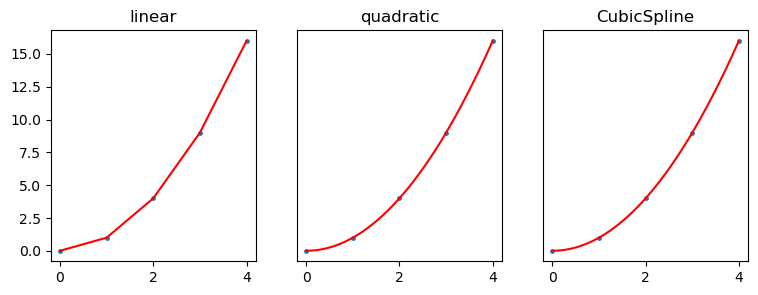

In [52]:
x_m = [0, 1, 2, 3, 4]
y_m = [0, 1, 4, 9, 16]
f_lin = interp1d(x_m, y_m, 'linear')  
f_qua = interp1d(x_m, y_m, 'quadratic')
f_cubspl = CubicSpline(x_m, y_m)

fig, ax = plt.subplots(1,3,figsize=(9,3))
a, b, c = ax
a.scatter(x_m, y_m, s=6)
b.scatter(x_m, y_m, s=6)
c.scatter(x_m, y_m, s=6)
b.set_yticks([])
c.set_yticks([])
x = np.linspace(0, 4, 401)

a.plot(x, f_lin(x), c='red')
a.set_title('linear')
b.plot(x, f_qua(x), c='red')
b.set_title('quadratic')
c.plot(x, f_cubspl(x), c='red')
c.set_title('CubicSpline');

### Interpolacija meritev

Sedaj spoznanja apliciramo na meritve iz uvodnega primera. Na osnovi podatkov meritev bomo ustvarili tri funkcije. Nato bomo vsako od njih uporabili za izračun 1000 vrednosti x enakomerno porazdeljenih na intervalu med -5 in 14 ter vse skupaj prikazali v treh grafih.

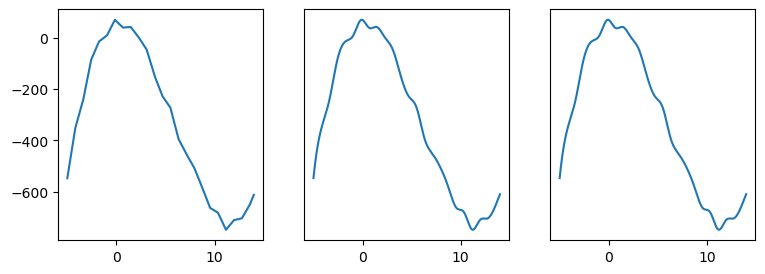

In [70]:
f_lin = interp1d(x_meritve, y_meritve, 'linear')
f_cub = interp1d(x_meritve, y_meritve, 'cubic')
f_cub_spl = CubicSpline(x_meritve, y_meritve)

x = np.linspace(-5, 14, 1000)
fig, ax = plt.subplots(1,3,figsize=(9,3))
levi, sredina, desni = ax
levi.plot(x, f_lin(x))
sredina.plot(x, f_cub(x))
desni.plot(x, f_cub_spl(x))

sredina.set_yticks([])
desni.set_yticks([]);

Iz prikazanih grafov vidimo, da z interpolacijo sicer dobimo funkcijski predpis s katerim lahko izračunamo vrednosti funkcije tudi izven merjenih točk, vendar z rezultatom verjetno ne moremo biti preveč zadovoljni, tudi kadar za interpolacijo uporabimo polinome višje stopnje. Interpolacija namreč zahteva, da funkcija dejansko poteka natančno skozi izmerjene vrednosti. Intuitivno po izgledu krivulje lahko sklepamo, da se dejanski opazovani pojav zelo verjetno vsaj teoretično ne obnaša tako, kot ga prikaže potek generirane funkcije.  

## Prilegajoča krivulja

Da bi dobili boljši približek, lahko uporabimo regresijske modele. Z regresijskim modelom lahko ustvarimo funkcijski predpis, ki se prilega podatkom, vendar pri tem ne zahtevamo, da mora funkcija dejansko potekati skozi točke izmerjenih vrednosti. Z novo funkcijo nato lahko izračunamo tudi vmesne vrednosti, kjer meritev nimamo. 

Izvedli bomo tri primere regresije, in sicer s polinomi poljubne stopnje, z uporabo vrste Chebisheva in z uporabo Hermitove vrste.


Iz podanih vrednosti točk v ravnini lahko konstruiramo regresijsko funkcijo z uporabo različnih algoritmov, ki so implementirani v knjižnici `numpy.polynomial`. Za vsak pristop imamo na voljo svoj razred, ki implementira funkcijo `fit()` s katero ustvarimo regresijsko funkcijo.  (glej tudi: https://numpy.org/doc/stable/reference/routines.polynomials-package.html#module-numpy.polynomial). 

Poskusimo ustvariti polinome po treh različnih metodah in jih prikazati v grafu: 

In [81]:
p1 = np.polynomial.Polynomial.fit(x_meritve, y_meritve, deg=1)
p2 = np.polynomial.Polynomial.fit(x_meritve, y_meritve, deg=2)
p3 = np.polynomial.Polynomial.fit(x_meritve, y_meritve, deg=3)

c1 = np.polynomial.Chebyshev.fit(x_meritve, y_meritve, deg=1)
c2 = np.polynomial.Chebyshev.fit(x_meritve, y_meritve, deg=2)
c3 = np.polynomial.Chebyshev.fit(x_meritve, y_meritve, deg=3)

h1 = np.polynomial.Hermite.fit(x_meritve, y_meritve, deg=1)
h2 = np.polynomial.Hermite.fit(x_meritve, y_meritve, deg=2)
h3 = np.polynomial.Hermite.fit(x_meritve, y_meritve, deg=3)


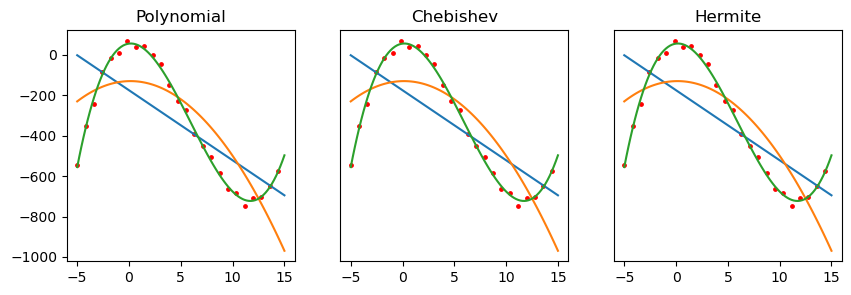

In [85]:
fig, ax = plt.subplots(1,3,figsize=(10,3))
ax1, ax2, ax3 = ax
x = np.linspace(-5,15,100)
ax1.scatter(x_meritve, y_meritve, s=6, c='r')
ax1.plot(x,p1(x))
ax1.plot(x,p2(x))
ax1.plot(x,p3(x))
ax1.set_title('Polynomial')
ax2.scatter(x_meritve, y_meritve, s=6, c='r')
ax2.plot(x,c1(x))
ax2.plot(x,c2(x))
ax2.plot(x,c3(x))
ax2.set_title('Chebishev')
ax2.set_yticks([])
ax3.scatter(x_meritve, y_meritve, s=6, c='r')
ax3.plot(x,h1(x))
ax3.plot(x,h2(x))
ax3.plot(x,h3(x))
ax3.set_title('Hermite')
ax3.set_yticks([]);

Ustvarjeno regresijsko funkcijo lahko uporabimo za izračun vrednosti funkcije za poljubno vrednost neodvisne spremenljivke. Na primer, zanima nas, koliko znaša vrednost funkcije p3, če za vrednost neodvisne premenljivke vzamemo 9.  

In [91]:
p3(9)

-613.8938915204026

Nova funkcija je polinom zahtevane stopnje. Z uporabo funkcije `convert()` lahko izpišemo koeficiente polinoma.

In [109]:
p3.convert()

Polynomial([ 55.96642094,   6.32778828, -18.11291433,   1.01554959], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

Do posameznega koeficienta lahko dostopimo preko atributa `coef`. 

In [111]:
p3.convert().coef

array([ 55.96642094,   6.32778828, -18.11291433,   1.01554959])

In [103]:
p3.convert().coef[2]

-18.112914328549408

## Prilagajanje poljubne krivulje
Drugi pristop h generiranju funkcije, ki opisuje merjeni pojav je, da v naprej predpostavimo model, t.j. funkcijo, ki verjetno opisuje opazovani pojav. Morda tudi iz poznavanja pojava že iz dosedanjega znanja vemo, s katerim modelom lahko pojav opišemo in nas zanimajo parametri modela, ki predstavljajo fizikalne ali druge lastnosti pojava. V našem primeru potek funkcije nekako nakazuje, da gre za kubično parabolo. Zato se odločimo, da bomo poskusili poiskati tiste parametre funkcije, ki nam bodo potek krivulje čimbolj približali izmerjenim podatkom. 

Torej poskusili bomo poiskati parametre splošne funkcije:
$$f(x) = ax^3 + bx^2 + cx + d$$

tako, da se bo funkcija čimbolj prilegala izmerjenim vrednostim. 

Za prilahajanje predpostavljenega modela podatkom bomo uporabili funkcijo `curve_fit()`.

Najprej definiramo model v obliki Python funkcije:

In [131]:
def f(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

Nato pa izračunamo parametre s pomočjo funkcije `curve_fit()`.

In [133]:
p_fit, p_cov = curve_fit(f, x_meritve, y_meritve, p0=[100,100,100,100])
a, b, c, d = p_fit

a, b, c, d

(1.015549593405694, -18.112914325423557, 6.327788242053404, 55.96642098512453)

Sedaj lahko izračunamo katerokoli funkcijsko vrednost za poljuben x.

In [135]:
f(9, a, b, c, d)

-613.893891602952

Potek funkcije lahko tudi narišemo, čeprav nas običajno dejansko zanimajo vrednosti a, b, c, d, saj predstavljajo lastnosti našega sistema.

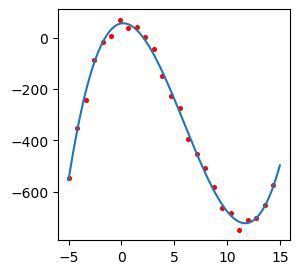

In [137]:
x_model = np.linspace(-5, 15, 100)
y_model = f(x_model, a, b, c, d)

fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(x_meritve, y_meritve, s=7, c='red')
ax.plot(x_model, y_model);

### Primerjava koeficientov
Na koncu primerjajmo oba pristopa. Z regresijo smo pripravili stopenjski polinom tretje stopnje z naslednjimi koeficienti:

In [150]:
p3.convert().coef

array([ 55.96642094,   6.32778828, -18.11291433,   1.01554959])

S pristopom prilagajanja teoretičnega modela podatkom, kjer smo za model prav tako uporabili polinom tretje stopnje, pa smo izračunali naslednje parametre modela:

In [145]:
p_fit

array([  1.01554959, -18.11291433,   6.32778824,  55.96642099])

## Optimizacija

V knjižnici `scipy` imamo na voljo različne funkcije s katerimi lahko poiščemo lokalni ali globalni minimum podane kriterijske funkcije. Če želimo poiskati maksimum, običajno uporabimo isti postopek, vendar kriterijsko funkcijo negativno predznačimo.

Za demonstracijo iskanja lokalnega minimuma ponovno uporabimo polinom iz predhodnih primerov.

$$ f(x) = x^3 - 18x^2 + 7x + 25 $$

Za začetek ne bomo upoštevli nobenih dodatnih omejitev. Opazovali bomo učinek podane začetne vrednosti na rezultate optimizacije.

Kriterijsko funkcijo implementiramo  v obliki Python funkcije. Podati moramo tudi začetno vrednost, ki jo bomo posredovali algoritmu za optimizacijo. Rezultat funkcije `minimize()` je objekt, ki vsebuje več parametrov, ki so rezultat optimizacije. Običajno nas bo zanimal vektor x, ki vsebuje vrednosti pri katerih ima friterijska funkcija minimum.

In [156]:
def f(x):
    return x**3 - 18*x**2 + 7*x + 25

x_0 = 5  #poskusi z začetno vrednostjo -2

In [225]:
r = minimize(f, x_0)
print(r)
r.x[0]

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -755.6880919418683
        x: [ 1.180e+01]
      nit: 5
      jac: [ 0.000e+00]
 hess_inv: [[ 2.866e-02]]
     nfev: 16
     njev: 8


11.80229765208334

## Optimizacija funkcije več spremenljivk z omejitvami

Optimizacijo lahko izvedemo za kriterijske funkcije z več spremenljivkami, različnimi omejitvami v obliki enakosti ali neenakosti in s podanimi mejami vrednosti spremenljivk. Funkcije in omejitve so lahko linearne ali nelinearne. Za iskanje minimuma uporabimo funkcijo `minimize()`, ki jo najdemo v knjižnici `scipy.optimize`. Za optimizacijo lahko uporabimo različne metode. Več o funkciji najdemo na: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

__Primer:__ \
Podana je kriterijska funkcija:
$$f(x_1, x_2) = (x_1 - 1)^2 + (x_2-2.5)^2$$

Vhodne parametre funkcije lahko zapišemo kot vektor:
$$\vec{x} = [x_1, x_2]$$
ob pogojih:
$$x_1 - 2x_2 >= -2$$
$$x_1 + 2x_2 <= 6$$
$$-x_1 + 2x_2 >= -2$$
$$x_1 >= 0$$
$$x_2 >= 0$$

Za potrebe nadaljnjega računanja bomo omejitve zapisali tako, da vse neenačbe pretvorimo v obliko, kjer bo leva stran enačbe >= 0.

$$x_1 - 2x_2 + 2 >= 0$$
$$-x_1 - 2x_2 + 6 >= 0$$
$$-x_1 + 2x_2 + 2 >= 0$$
$$x_1 >= 0$$
$$x_2 >= 0$$


Kriterjisko funkcijo definiramo kot funkcijo v Pythonu:

In [166]:
def f(x):
    x1, x2 = x
    return (x1-1)**2 + (x2-2.5)**2

Nato določimo omejitve, ki jih prav tako zapišemo v obliki funkcij. Vrednosti funkcij morajo ustrezati levi strani enačbe ali neenačbe, kjer je leva stran $>= 0$. Zato smo omejitve prej ustrezno preoblikovali:

In [168]:
def omejitev_1(x):
    x1, x2 = x
    return x1 - 2*x2 + 2

def omejitev_2(x):
    x1, x2 = x
    return -x1 - 2*x2 + 6 

def omejitev_3(x):
    x1, x2 = x
    return -x1 + 2*x2 + 2


Iz zgornjega zapisa ni jasno, ali funkcija predstavlja omejitev, ki je določena kot enačba ali neenačba.
Zato moramo za potrebe minimizacije opredeliti tudi tip omejitve. To bomo naredili z uporabo slovarjev, zato ker tako zahtevajo funkcije knjižnice `scipy`.

In [170]:
o1 = {'type':'ineq', 'fun': omejitev_1}
o2 = {'type':'ineq', 'fun': omejitev_2}
o3 = {'type':'ineq', 'fun': omejitev_3}

Vse omejitve nato združimo v seznam (ali n-terico) omejitev: 

In [172]:
o = [o1, o2, o3]

Prav tako pripravimo meje vrednosti spremenljivk. Lahko bi jih definirali enako kot prej omejitve, vendar jih lahko definiramo tudi enostavneje, kot sledi. Le te podamo kot par (od, do). Če spodnje ali zgornje meje ne podamo, to zapišemo kot 'None', kar pomeni, da meje nismo določili:

In [174]:
meje_x1 = (0, None)
meje_x2 = (0, None)
m = (meje_x1, meje_x2)

Ko smo določili funkcijo, omejitve in meje, lahko izvedemo optimizacijo. Moramo se le še odločiti, kje začeti, torej določiti moramo vektor začetnih vrednosti parametrov kriterijske funkcije. Zapomnimo si, da je določanje začetne vrednosti zelo pomembno pri iskanju pravilne rešitve.

In [176]:
x = (2, 0)  #če začnemo zunaj omejitev, morda ne pridemo do prave rešitve!
r = minimize(f, x, bounds=m, constraints=o)

print(r)
r.x[0], r.x[1]

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3


(1.4000000033834283, 1.7000000009466527)

#### vizualizacija problema

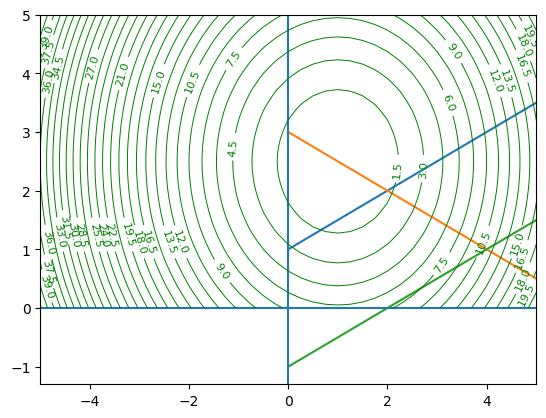

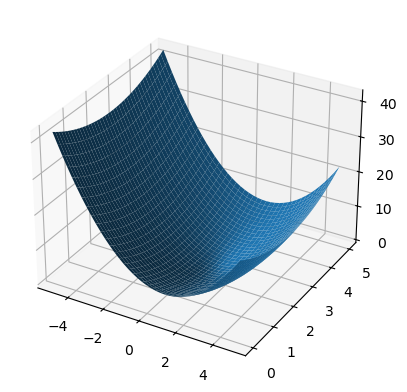

In [496]:

fig, ax = plt.subplots()

x = np.linspace(-0, 5, 21)
y = (x + 2)/2
ax.plot(x, y)
y = (-x + 6)/2
ax.plot(x, y)
y = (x - 2)/2
ax.plot(x, y)
ax.axvline(0)
ax.axhline(0)
x = np.linspace(-5, 5, 41)
y = np.linspace(0, 5, 41)

x, y = np.meshgrid(x, y)
z = f([x, y])

konture = ax.contour(x, y, z, levels=30, vmax=1, linewidths=0.7, colors='green')
ax.clabel(konture, fontsize=8);


fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(x, y, z, vmax=1)

#### več o funkciji minimize
Opis funkcije in njenih parametrov si lahko hitro prikličemo tudi tako:

In [189]:
minimize?

### generiranje "merjenih" podatkov
Za uvodni primer smo "merjene" podatke ustvarili tako, da smo izračunali prave vrednosti  podane funkcije v 100 točkah, ki smo jih nekoliko pokvarili z naključno generiranimi vrednostmi. Nato smo iz nabora vseh izračunanih vrednosti izbrali le vsako četrto.

In [188]:
x_meritve = [-5.000000,-4.191919,-3.383838,-2.575758,-1.767677,-0.959596,-0.151515,0.656566,1.464646,2.272727,3.080808,3.888889,4.696970,5.505051,6.313131,7.121212,7.929293,8.737374,9.545455,10.353535,11.161616,11.969697,12.777778,13.585859,14.393939]
y_meritve = [-547.148440,-353.038240,-242.999924,-86.603669,-14.756501,8.505361,69.994019,39.502621,42.075558,1.744931,-45.763899,-148.214227,-228.011926,-272.514651,-392.931986,-452.723155,-505.971239,-582.549094,-662.777496,-681.709586,-748.371566,-710.645987,-703.930784,-650.930046,-575.409236]

In [182]:
import random as rnd

def f(x):
    return x**3 - 18*x**2 + 7*x + 25   

x = np.linspace(-5, 15, 100)
y = f(x) + np.random.rand(len(x))*50

x_str = 'x_meritve = ['

x = x[::4]
y = y[::4]

for x_i in x:
    x_str += f'{x_i:.6f},'
print(x_str)

y_str = 'y_meritve = ['
for y_i in y:
    y_str += f'{y_i:.6f},'
print(y_str)


x_meritve = [-5.000000,-4.191919,-3.383838,-2.575758,-1.767677,-0.959596,-0.151515,0.656566,1.464646,2.272727,3.080808,3.888889,4.696970,5.505051,6.313131,7.121212,7.929293,8.737374,9.545455,10.353535,11.161616,11.969697,12.777778,13.585859,14.393939,
y_meritve = [-547.148440,-353.038240,-242.999924,-86.603669,-14.756501,8.505361,69.994019,39.502621,42.075558,1.744931,-45.763899,-148.214227,-228.011926,-272.514651,-392.931986,-452.723155,-505.971239,-582.549094,-662.777496,-681.709586,-748.371566,-710.645987,-703.930784,-650.930046,-575.409236,
